“Labour and Unemployment Rate” data

In this we would be wrangling the Labour__Unemployment_Rate.xlsx obtained from https://databank.worldbank.org/ which contains the labor and unemployment rate from different countires over the years.


In [1]:
library(tidyverse)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#remotes::install_github("ropensci/visdat")
library(visdat)

In [25]:
data <- read_excel('Labour__Unemployment_Rate.xlsx', col_names = TRUE) #To read excel

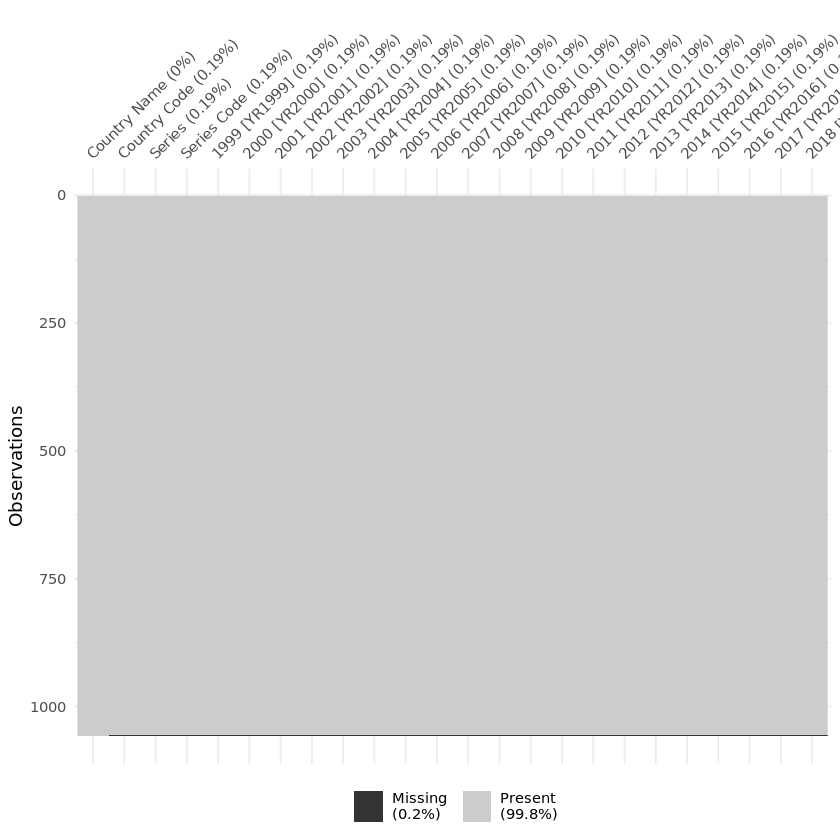

In [4]:
vis_miss(data) # To see missing data


In [5]:
data<-na.omit(data) # To delete the bottom lines with file information.
str(data) # To see the structure of the dataframe

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1056 obs. of  24 variables:
 $ Country Name : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Country Code : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ Series       : chr  "Labor force, total" "Unemployment, total (% of total labor force)" "Unemployment, male (% of male labor force)" "Unemployment, female (% of female labor force)" ...
 $ Series Code  : chr  "SL.TLF.TOTL.IN" "SL.UEM.TOTL.ZS" "SL.UEM.TOTL.MA.ZS" "SL.UEM.TOTL.FE.ZS" ...
 $ 1999 [YR1999]: chr  "6309513" "3.60599994659424" "3.86199998855591" "3.07500004768372" ...
 $ 2000 [YR2000]: chr  "6521151" "3.51699995994568" "3.76999998092651" "2.9909999370575" ...
 $ 2001 [YR2001]: chr  "6836893" "3.42600011825562" "3.67600011825562" "2.90599989891052" ...
 $ 2002 [YR2002]: chr  "7221944" "3.54999995231628" "3.78399991989136" "3.06399989128113" ...
 $ 2003 [YR2003]: chr  "7644720" "3.41899991035461" "3.6489999294281" "2.94300007820129" ...
 $ 2004 [YR2004]: chr  "8065343" "3.08

In [6]:
#Converting the type of each column data to appropriate data type
data$'1999 [YR1999]'  <- as.numeric(data$'1999 [YR1999]') 
data$'2000 [YR2000]' <- as.numeric(data$'2000 [YR2000]')
data$'2001 [YR2001]' <- as.numeric(data$'2001 [YR2001]')
data$'2002 [YR2002]' <- as.numeric(data$'2002 [YR2002]')
data$'2003 [YR2003]' <- as.numeric(data$'2003 [YR2003]')
data$'2004 [YR2004]' <- as.numeric(data$'2004 [YR2004]')
data$'2005 [YR2005]' <- as.numeric(data$'2005 [YR2005]')
data$'2006 [YR2006]' <- as.numeric(data$'2006 [YR2006]')
data$'2007 [YR2007]' <- as.numeric(data$'2007 [YR2007]')
data$'2008 [YR2008]' <- as.numeric(data$'2008 [YR2008]')
data$'2009 [YR2009]' <- as.numeric(data$'2009 [YR2009]')
data$'2010 [YR2010]' <- as.numeric(data$'2010 [YR2010]')
data$'2011 [YR2011]' <- as.numeric(data$'2011 [YR2011]')
data$'2012 [YR2012]' <- as.numeric(data$'2012 [YR2012]')
data$'2013 [YR2013]' <- as.numeric(data$'2013 [YR2013]')
data$'2014 [YR2014]' <- as.numeric(data$'2014 [YR2014]')
data$'2015 [YR2015]' <- as.numeric(data$'2015 [YR2015]')
data$'2016 [YR2016]' <- as.numeric(data$'2016 [YR2016]')
data$'2017 [YR2017]' <- as.numeric(data$'2017 [YR2017]')
data$'2018 [YR2018]' <- as.numeric(data$'2018 [YR2018]')

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, e

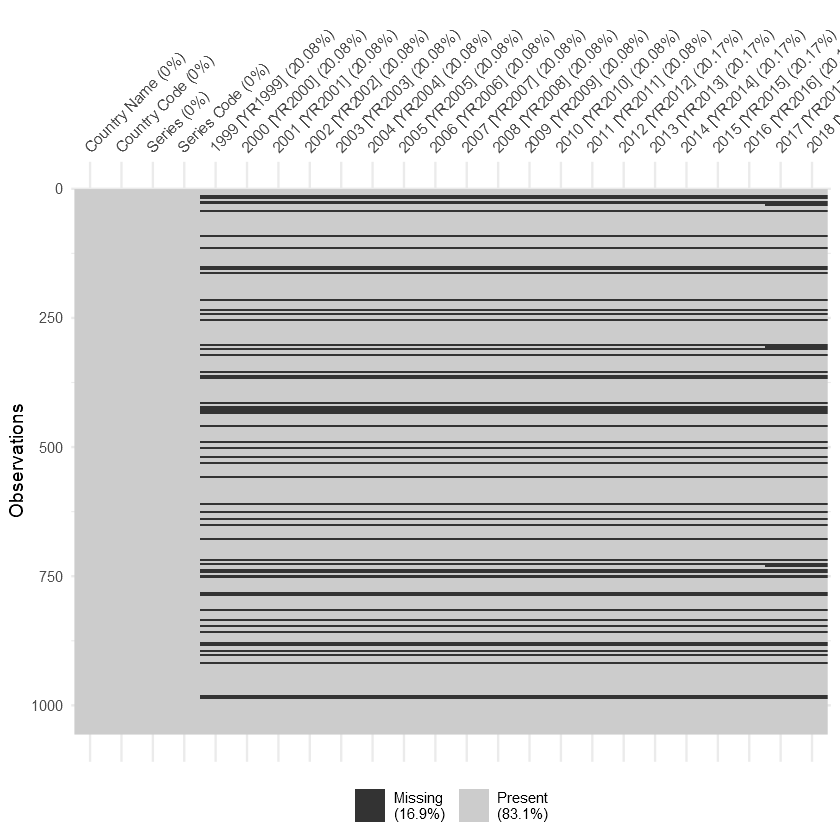

In [8]:
vis_miss(data)


In [7]:
#1 To drop rows which are 100% missing values
data <- data %>%
drop_na("1999 [YR1999]":"2000 [YR2000]")

In [8]:
#2 To assign '0' value to all the NA values
data[is.na(data)] <- 0   #2

#1 To drop rows containing 100% missing values Reference: https://tidyr.tidyverse.org/reference/drop_na.html¶


#2 Reference:https://statisticsglobe.com/r-replace-na-with-0/

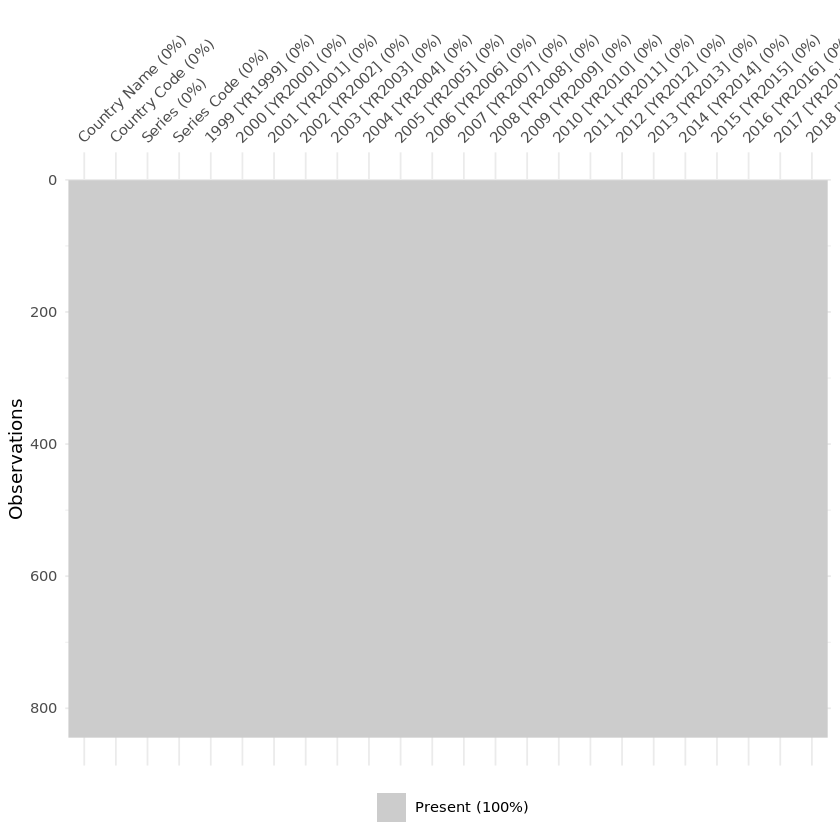

In [9]:
vis_miss(data)


In [10]:
#To rename the column names
data <- data %>%
  rename(
    '1999' = '1999 [YR1999]',
    '2000' = '2000 [YR2000]',
    '2001' = '2001 [YR2001]',
    '2002' = '2002 [YR2002]',
    '2003' = '2003 [YR2003]',
    '2004' = '2004 [YR2004]',
    '2005' = '2005 [YR2005]',
    '2006' = '2006 [YR2006]',
    '2007' = '2007 [YR2007]',
    '2008' = '2008 [YR2008]',
    '2009' = '2009 [YR2009]',
    '2010' = '2010 [YR2010]',
    '2011' = '2011 [YR2011]',
    '2012' = '2012 [YR2012]',
    '2013' = '2013 [YR2013]',
    '2014' = '2014 [YR2014]',
    '2015' = '2015 [YR2015]',
    '2016' = '2016 [YR2016]',
    '2017' = '2017 [YR2017]',
    '2018' = '2018 [YR2018]',
    )

In [11]:
# To downlod development version from github
#devtools::install_github("tidyverse/tidyr")
library(tidyr)

In [13]:
# To gather column values
data_long <- pivot_longer(data, "1999":"2018", names_to = "Year", names_prefix = NULL,
  names_sep = NULL, names_pattern = NULL, names_ptypes = list(),
  names_repair = "check_unique", values_to = "Value",
  values_drop_na = FALSE, values_ptypes = list())
data_long

Country Name,Country Code,Series,Series Code,Year,Value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,1999,6309513.000
Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,2000,6521151.000
Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,2001,6836893.000
Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,2002,7221944.000
Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,2003,7644720.000
Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,2004,8065343.000
Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,2005,8459571.000
Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,2006,8677865.000
Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,2007,8859372.000


In [27]:
data <- data_long %>% select(-"Series Code") # To remove a column

In [28]:
# To spred a column
data_wide <- pivot_wider(data, names_from = Series, names_repair = "check_unique",
  values_from = Value, values_fill = NULL)
data_wide

Country Name,Country Code,Year,"Labor force, total","Unemployment, total (% of total labor force)","Unemployment, male (% of male labor force)","Unemployment, female (% of female labor force)"
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1999,6309513,3.606,3.862,3.075
Afghanistan,AFG,2000,6521151,3.517,3.770,2.991
Afghanistan,AFG,2001,6836893,3.426,3.676,2.906
Afghanistan,AFG,2002,7221944,3.550,3.784,3.064
Afghanistan,AFG,2003,7644720,3.419,3.649,2.943
Afghanistan,AFG,2004,8065343,3.087,3.264,2.723
Afghanistan,AFG,2005,8459571,2.942,3.089,2.642
Afghanistan,AFG,2006,8677865,2.825,3.005,2.453
Afghanistan,AFG,2007,8859372,2.128,2.139,2.105


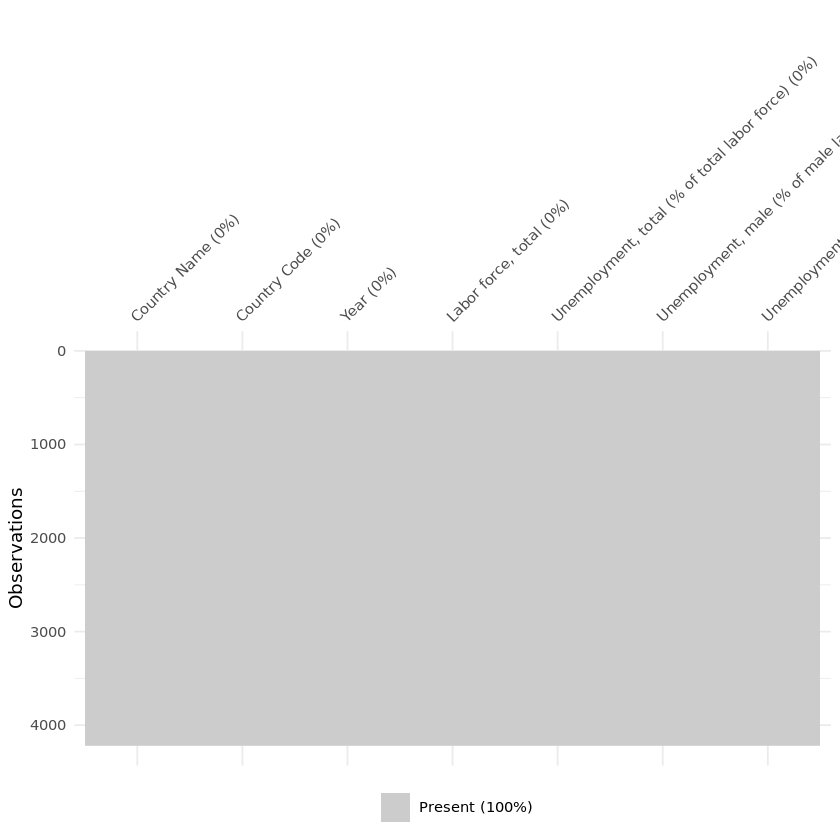

In [29]:
vis_miss(data_wide)

In [30]:
data <- data_wide %>%
select("Country Name":"Labor force, total",
       "Unemployment, total (% of total labor force)") # To select columns

In [31]:
write_csv(data, path = "Labour__Unemployment_Rate_Wrangled.csv") # To save as CSV
